# E2a: Küchentischversuch zum Laval-Rotor

Name: Malte Kramp 
Datum: 09.01.2024 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:
Wie gut kann ein simpler Sensor genutzt werden, um die Schwingung von Alltagsgegenständen zu messen? 

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch1.jpg" width="500">

- Beschreibung des Aufbaus: Der Bewegungssensor wird an die Rückseite meines IPhones getaped.
- Vorgangsbeschreibung: Auf dem IPhone werden 20 Sekunden lang Testvibrationen abgepielt.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [15]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [16]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = 'measurement_data/data_20240109_152742_MalteKramp_phone' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20240109_152742_MalteKramp_phone.h5' # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [17]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_152742_MalteKramp_phone/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_152742_MalteKramp_phone/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_152742_MalteKramp_phone/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeab001-0168-62a2-9416-9b5f6ce3c38e": {
    "type": "probe",
    "name": "phone",
    "comment": "",
    "path": "measurement_data/data_2024010

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [20]:
#zusammenfügen von location und name um hdf5 datei auslesen zu können
path_and_file = path_measurement_folder + "/" + h5_file_name
with h5py.File(path_and_file) as f:
    #die datasets werden aus der hdf5 Datei ausgelesen...
    a_x = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_x"]
    a_y = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_y"]
    a_z = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_z"]
    time = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp"]
    #...und zum leichtere Umgang als numpy arrays gespeichert
    a_X = np.array(a_x)
    a_Y = np.array(a_y)
    a_Z = np.array(a_z)
    Time = np.array(time)
    


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [21]:
#aufrufen der vorher definierten funktion 
from functions.m_postprocessing import get_vec_accel
av = get_vec_accel(a_X, a_Y, a_Z)



#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

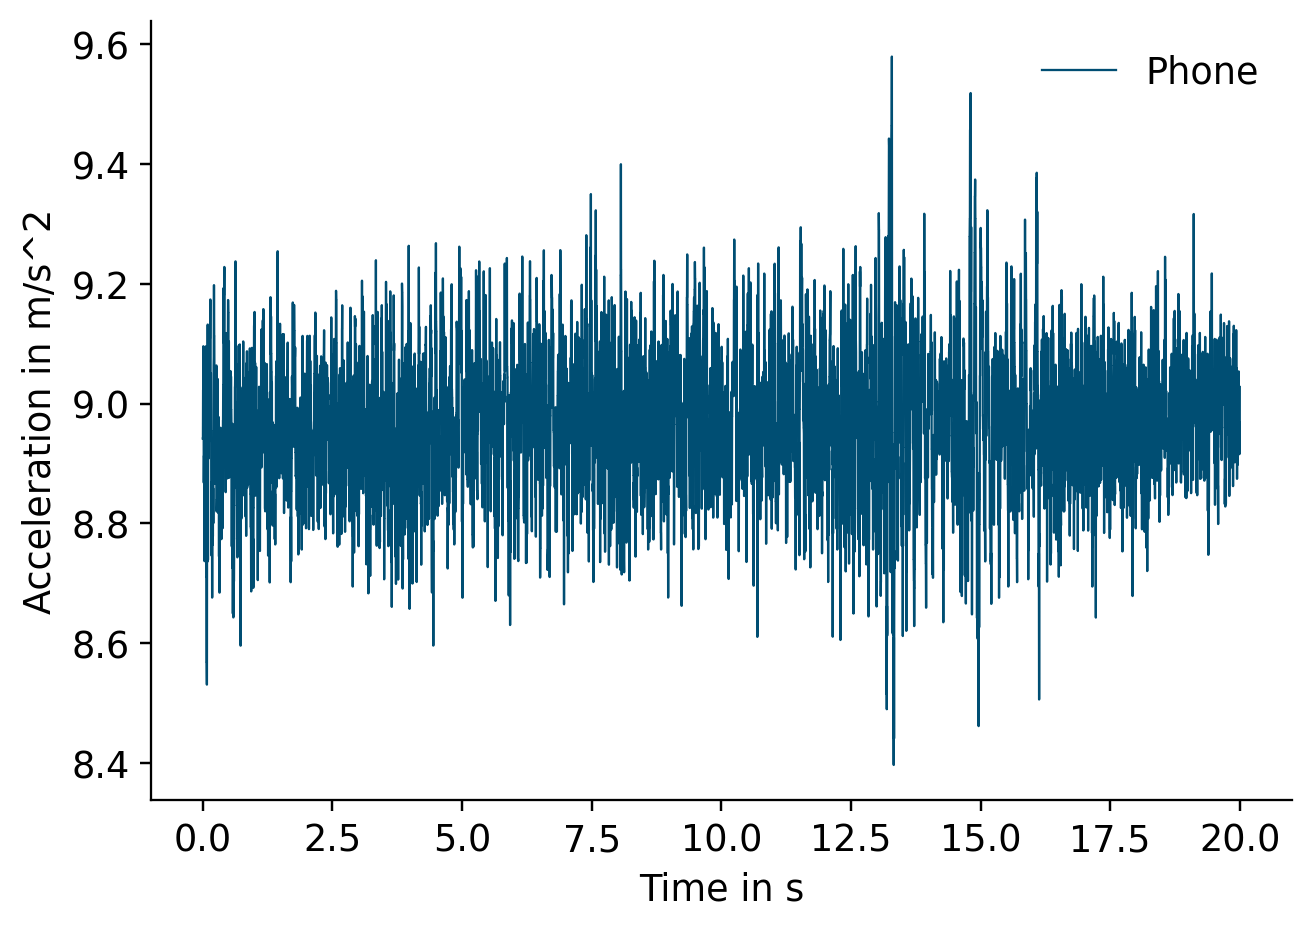

In [22]:
#beträge über zeit plotten
plt.plot(Time, av, label = 'Phone')

#achsen beschriften
plt.xlabel('Time in s')
plt.ylabel('Acceleration in m/s^2')
plt.legend() 
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [23]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

#Aufgrund meiner Annahme in Aufgabe 4.3.3, dass die Reaktionszeit des Pis in guter Annäherung als Null angenommen werden kann, ist hier keine interpolation nötig, da das Zeit-array schon aus Werten mit gleichen Abständen besteht.

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

(0.0, 1000.0)

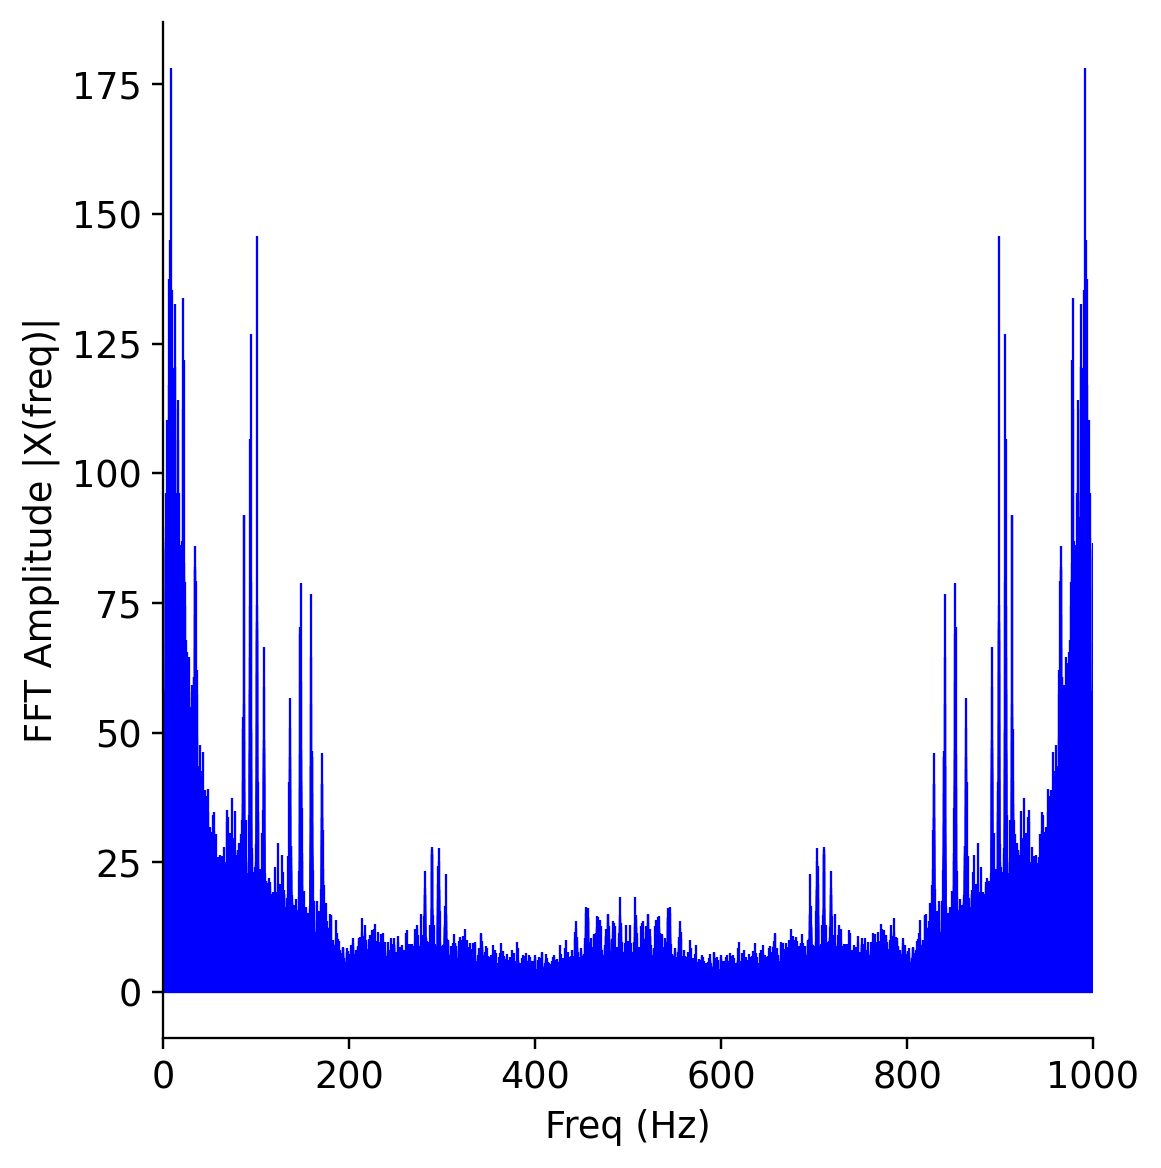

In [24]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
#Aufrufen der vorher definierten Fuktion
ff = my_fft( av, Time)
X = ff[0]
freq = ff[1]
#plot erstellen
plt.figure(figsize = (12, 6))
plt.subplot(121)
#daten plotten
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 1000)

#plt.subplot(122)
#plt.plot(t, ifft(X), 'r')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
#plt.show()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch2.jpg" width="500">

- Beschreibung des Aufbaus: Der Sensor wird an meinen Bloutooth speaker getaped.
- Vorgangsbeschreibung: Auf dem Speaker wird ein Lied mit hohem Bass (Solid Stigma by Angerfist) auf hoher Lautstärke abgespielt

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [25]:
path_measurement_folder = 'measurement_data/data_20240109_163535_MalteKramp_speaker' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20240109_163535_MalteKramp_speaker.h5' # replace None by the filename of the hdf5-file

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [27]:
#zusammenfügen von location und name um hdf5 datei auslesen zu können
path_and_file = path_measurement_folder + "/" + h5_file_name
with h5py.File(path_and_file) as f:
    #die datasets werden aus der hdf5 Datei ausgelesen...
    a_x = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_x"]
    a_y = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_y"]
    a_z = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_z"]
    time = f["RawData/1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp"]
    #...und zum leichtere Umgang als numpy arrays gespeichert
    a_X = np.array(a_x)
    a_Y = np.array(a_y)
    a_Z = np.array(a_z)
    Time = np.array(time)


#### 2. Betrag der Beschleunigung berechnen


In [30]:
#aufrufen der orher definierten Funktion
from functions.m_postprocessing import get_vec_accel
av = get_vec_accel(a_X, a_Y, a_Z)


#### 3. Darstellung der Messdaten

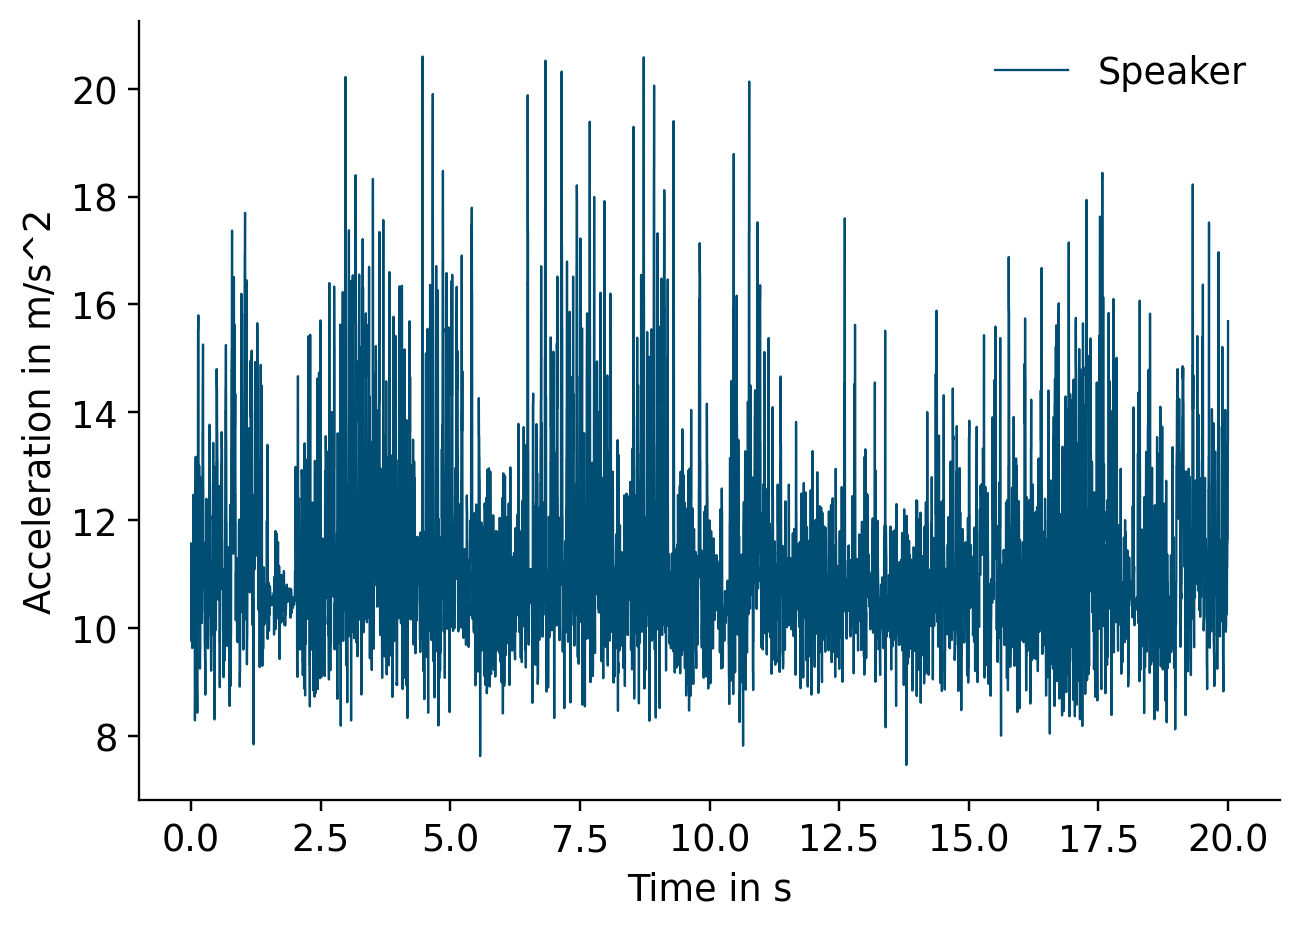

In [31]:
#plotten der Beträge
plt.plot(Time, av, label = 'Speaker')
#achsen beschriften
plt.xlabel('Time in s')
plt.ylabel('Acceleration in m/s^2')
plt.legend() 
plt.show()

#### 4. Interpolation der Messwerte



In [32]:
#Aufgrund meiner Annahme in Aufgabe 4.3.3, dass die Reaktionszeit in guter Annäherung als Null angenommen werden kann, ist hier keine interpolation nötig, da das Zeit-array schon aus Werten mit gleichen Abständen besteht.

#### 5 & 6. FFT durchführen und graphisch darstellen


(0.0, 1000.0)

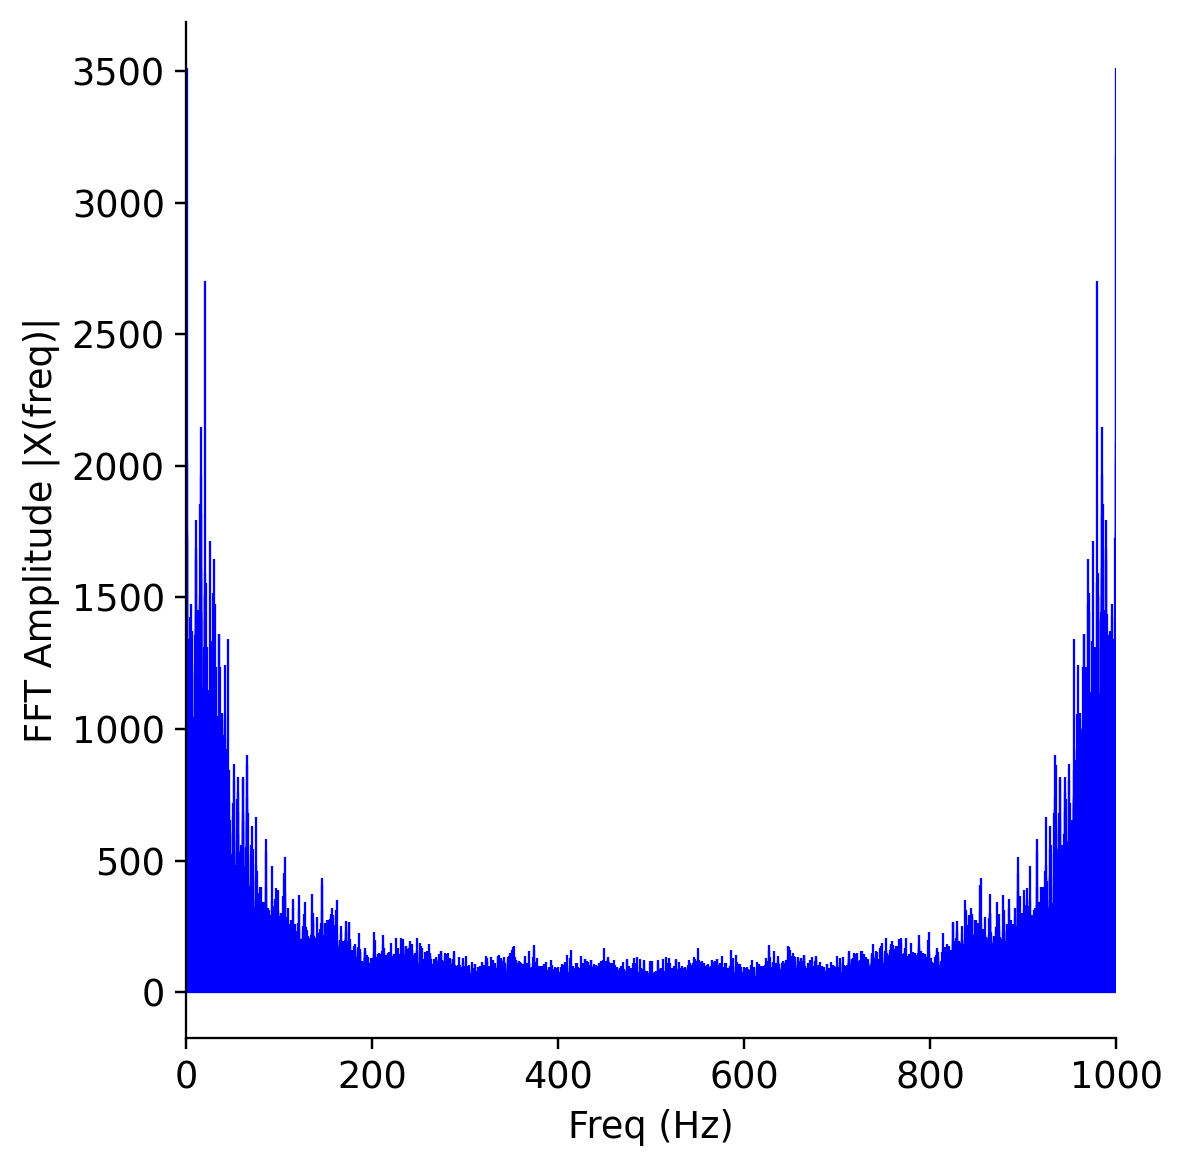

In [33]:
#aufrufen der vorher definierten Funktion
ff = my_fft( av, Time)
X = ff[0]
freq = ff[1]
#erstellen ds plots
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plotten der daten
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 1000)

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Die Ergebnisse scheinen Sinnvoll, mit realistisch wirkenden Plots zur Visualisierung. Allerdings kann ich nicht sicher Abschätzen, wie groß der Einfluss meiner Annahme in Aufgabe 4.3.3 war, vor allem auf die Ergebnisse der fft, die ja erheblich von der genauigkeit der Frequenz abhängen.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der gestellte Bewegungssensor war sehr intuitiv zu nutzen, und ich fand die Messung von Schwingungen von Haushaltsgegenständen die bis jetzt interessanteste Anwendung in diesem Modul.
Außerdem nimmt mit dem mit der Zeit wachsenden Verständnis bezüglich hdf5 Dateien, Messvorgängen mit dem Pi und Datenstrukturen generell die Frustration beim Bearbeiten der gestellten Aufgaben immer weiter ab,
was für eine sinnvolle Lernkurve spricht.